# Create figures (Part II)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from scipy.optimize import brentq
import sys
sys.path.insert(0,"../bowshock-shape/")
from equation6 import Shell
from scipy.interpolate import interp1d
from equation6 import _finfCRW
from equation6 import _finf
%matplotlib inline

# Shapes of thin shell bowshocks

Make a figure for:
 - Cantoids and ancantoids bow shocks with fixed $\beta$ (show the anisotropy effects)
 - Show bow shocks with fixed anisotropy index (cantoids and wikinoids in one figure and ancantoids separately with high and low anisotropy index) and varying $\beta$

In [2]:
theta = np.linspace(0, np.pi, 500, endpoint=False)
beta = ["wilkinoid", 1e-3, 1e-2, 0.05, 0.08, 0.5, 0.99]
index = ["cantoid", 1.0, 0.8, 0.6, 0.4]

In [3]:
def complete_shape(r, t):
    """
    Gives the mirror part of the bow shock shape
    """
    t = np.delete(t, 0)
    r0 = r[0] #save first element for further use
    r = np.delete(r, 0)
    t_com = np.array([-t, t])
    r_com = np.array([r, r])
    t_com, r_com = t_com.reshape(2*len(t)), r_com.reshape(2*len(r))
    t_com = np.append(t_com, 0.0)
    r_com = np.append(r_com, r0) # avoid duplicate t =0 and r = r0
    t_com, r_com = zip(*sorted(zip(t_com, r_com)))
    t_com = np.asarray(t_com)
    r_com = np.asarray(r_com)
    mask = np.isfinite(r_com) & np.isfinite(t_com)
    return t_com[mask], r_com[mask]

In [4]:
def wilkinoid(t):
    """
    Draws the wilkinoid shape, normalized with R0
    """
    R = np.sqrt(3*(1-t/np.tan(t))/np.sin(t)**2)
    R[0] = 1.
    return R

## Figure with varying $\beta$, for cantoids and ancantoids

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


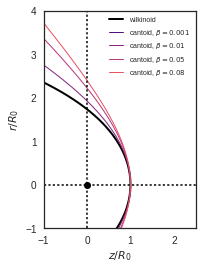

In [5]:
sns.set_style("white")
colors = sns.color_palette("magma", n_colors=len(beta))
for b, c in zip(beta[:-2], colors[:-2]):
    if b=="wilkinoid":
        R = wilkinoid(theta)
        label= "wilkinoid"
        col = "k"
        lw = 2
    else:
        shell = Shell(beta=b, innertype="isotropic")
        r = shell.radius(theta)
        R = r/r[0] # Normalize radius with R0
        label= r"cantoid, $\beta={}$".format(b)
        col = c
        lw = 1
    t = np.zeros_like(2*theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, c=col, linewidth = lw)
plt.plot([0], [0], "ko")
plt.plot([-1.5, 3], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 5], "k:", lw=1.5)
plt.legend(fontsize="x-small", ncol=1, loc="upper right")
plt.axes().set_aspect('equal')
plt.xlim(-1, 2.5)
plt.ylim(-1, 4)
plt.xlabel(r"$z/R_0$")
plt.ylabel(r"$r/R_0$")
plt.savefig("./Figures/cantoid-wilkinoid-shape.pdf")

## Figure with fixed anisotropy index ancantoids

Proplyd case: $k = 0.5$, $\xi =0.8$

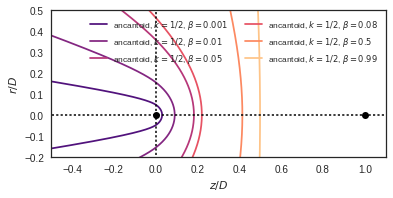

In [6]:
for b, c in zip(beta[1:], colors[1:]):
    proplyd = Shell(beta=b, innertype="proplyd")
    R = proplyd.radius(theta)
    label= r"ancantoid, $k = 1/2$, $\beta={}$".format(b)
    t = np.zeros_like(2*theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, c=c)
plt.plot([0], [0], "ko")
plt.plot([1], [0], "ko")
plt.plot([-1.5, 1.5], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 1.5], "k:", lw=1.5)
plt.legend(fontsize="small", ncol=2, loc="best")
plt.axes().set_aspect('equal')
plt.xlim(-0.5, 1.1)
plt.ylim(-0.2, 0.5)
plt.xlabel(r"$z/D$")
plt.ylabel(r"$r/D$")
plt.savefig("./Figures/ancantoid-shape.pdf")

## Figure using fixed $\beta$

Fixed $\beta = 0.01$, varying from cantoid to very anisotropic ancantoid

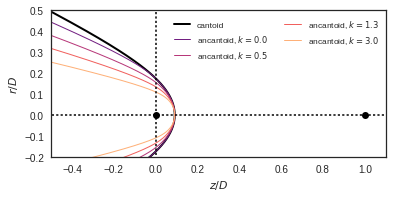

In [7]:
colors_x = sns.color_palette("magma", n_colors=len(index))
for xi, c in zip(index, colors_x):
    if xi=="cantoid":
        shell = Shell(beta=0.01, innertype="isotropic")
        label= "cantoid"
        lw = 2
        col = "k"
    else:
        shell = Shell(beta=0.01, innertype="anisotropic", xi=xi)
        k = 2./xi-2
        label= r"ancantoid, $k={:.1f}$".format(k)
        lw = 1
        col = c
    R = shell.radius(theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, linewidth=lw, c=col)
plt.plot([0], [0], "ko")
plt.plot([1], [0], "ko")
plt.plot([-1.5, 1.5], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 1.5], "k:", lw=1.5)
plt.legend(fontsize="small", ncol=2, loc="best")
plt.axes().set_aspect('equal')
plt.xlim(-0.5, 1.1)
plt.ylim(-0.2, 0.5)
plt.xlabel(r"$z/D$")
plt.ylabel(r"$r/D$")
plt.savefig("./Figures/cantoid-ancantoid-shape-bfixed.pdf")

# $\Pi$ vs $\Lambda$ diagnostic diagram

We need the formulae from CRW model chapter:

\begin{equation}
\Lambda = \frac{\left(3\xi\right)^{1/2}\left(1+\beta^{1/2}\right)}{\left(1 + \frac{1}{5}\xi\beta\right)^{1/2}\left(1-\xi\beta\right)}
\end{equation}

\begin{equation}
\Pi = \left|1-2R_{\theta,\theta}\right|^{-1}
\end{equation}

$$R_{\theta,\theta} = \frac{C_{k\beta}}{1+\beta^{1/2}} + \frac{1+2\beta^{1/2}}{6}$$

$$C_{k\beta} = \frac{1}{2}\left(A_k - \frac{\beta}{15}\right)$$

$$A_k = \frac{1}{15} - \frac{3k}{20}$$

Calculating alatude and planitude for each anisotropy index

We will include a numerical calculation of $R_c$, marked with filled circles to compare with the analytical curves. This numerical results will be useful when estimating the projected alatude and planitude (instead of the two quadrics fit)

Start defining arrays for $\xi$ and $\beta$

In [8]:
beta_arr = np.linspace(1e-4, 0.99, 100)
xi = np.array([1.0, 0.8, 0.6, 0.4])
sb = np.sqrt(beta_arr)
beta_d = np.array([1e-3, 1e-2, 1e-1, 0.5])

In [9]:
def num_fit(r, t, dt=np.radians(30.), epsilon=1e-4, debug=False):
    """
    Find polinomial estimation of r(t):
    Fit r as r \simeq R0 + 0.5*Rtt*t^2 + 1./24*R4t*t^4 using t < 30 deg. The odd 
    coefficients should be zero since we will use the complete shape, which is symmetric with t.
    The second order coefficient will help us to find the planitude \Pi
    
    Entries:
    t: Angle array
    r: shell shape r(t)
    dt: maximum value of |t| for the fit
    epsilon: proposed margin error for fit tests
    """
    ############## Polinomial fit of r ###############
    m = np.abs(t) <= dt
    p = np.polyfit(t[m], r[m], 4)
    r0 = np.abs(r).min()
    # Warning test: match between r[0] and the last coefficient
    if debug==True:
        print("Starting debug")
        if np.abs(p[-1] - r0) > epsilon:
            print("Warning: something is not going on. The last coefficient doesn't match with R0")
            print("Real:{:.3f}, Fit:{:.3f}".format(r0, p[-1]))
    Rc = p[-1]**2/(p[-1] - 2*p[2])
    return Rc

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in sqrt


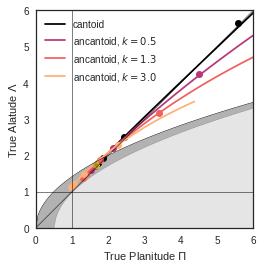

In [10]:
for X, c in zip(xi, colors_x[1:]):
    Lambda = np.sqrt(3*X)*(1+sb)/(np.sqrt(1+0.2*X*beta_arr)*(1-X*beta_arr))
    k = 2./X -2
    Ak = 1./15 - 3*k/20
    Ckb = 0.5*(Ak-beta_arr/15.)
    Rtt = Ckb/(1+sb) + (1+2*sb)/6.
    Pi = 1./(1-2*Rtt)
    if X==1.0:
        label=r"cantoid"
        c = "k"
    else:
        label=r"ancantoid, $k={:.1f}$".format(k)
    plt.plot(Pi, Lambda, label=label, c=c)
    ############### Estimate and plot numerical estimations #####################
    t = np.zeros_like(2*theta)
    for b in beta_d:
        shell = Shell(beta=b, innertype="anisotropic", xi=X)
        R = shell.radius(theta)
        R0 = R[0]
        t, R = complete_shape(R, theta)
        t = np.asarray(t)
        R = np.asarray(R)
        Rc =  num_fit(R, t, epsilon=1e-2)
        Pi_d = Rc/R0
        Lambda_d = np.sqrt(3*X)*(1+np.sqrt(b))/(np.sqrt(1+0.2*X*b)*(1-X*b))
        marker_color = c
        marker_shape = "o"
        plt.plot(Pi_d, Lambda_d, c=marker_color, marker=marker_shape)
    #############################################################################
plt.plot(5./3, np.sqrt(3.), c="y", marker="o", lw=3, alpha=1)  #Plot Wilkinoid shape
#############  Numerical estimation of Alatude and planitude for wilkinoid shape #################
R_w = wilkinoid(theta)
t_w = np.zeros_like(2*theta)
t_w, R_w = complete_shape(R_w, theta)
Pi_w = num_fit(R_w, t_w, epsilon=1e-2)
Lambda_w = np.sqrt(3.)
plt.plot(Pi_w, Lambda_w, c="m", marker="*", alpha=0.4)
##################################################################################################
plt.legend()
plt.xlabel(r"True Planitude $\Pi$")
plt.ylabel(r"True Alatude $\Lambda$")
#################### Quadric regions shades ############################
Pi_arr = np.linspace(0, 6, 100)
L_par = np.sqrt(2*Pi_arr)
L_circ = np.sqrt(2*Pi_arr - 1)
L_circ[~np.isfinite(L_circ)] = 0.0 
plt.plot(Pi_arr, L_par, "k", lw=0.5)
plt.plot(Pi_arr, Pi_arr, "k", lw=0.5)
plt.plot(Pi_arr, np.ones_like(Pi_arr), "k", lw=0.5)
plt.plot(np.ones_like(Pi_arr), Pi_arr, "k", lw=0.5)
plt.fill_between(Pi_arr, L_par, L_circ, alpha=0.3, color="black")
plt.fill_between(Pi_arr, L_circ, alpha=0.1, color="black")
########################################################################
plt.axes().set_aspect('equal')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.savefig("./Figures/Pi-vs-Lambda.pdf")

# Apparent shape of cantoids and ancantoids 

The apparent shape may be obtained by using the transformations of section 2.4, specially the following:

\begin{equation}
\left(\begin{array}{c}
x_T \\ y_T \\ z_T
\end{array}\right) = 
\left(\begin{array}{c}
R(\theta) \left(\cos\theta\cos i -\sin\theta\sin\phi_T\sin i\right) \\
R(\theta)\sin\theta\left(1 - \sin^2\phi_T\right)^{1/2}\\
R(\theta)\left(\cos\theta\sin i + \sin\theta\sin\phi_T\cos i\right)
\end{array}\right)
\end{equation}

Where:
\begin{equation}
\sin\phi_T = -\tan i \tan\alpha = \tan i\frac{1 + \omega\tan\theta}{\omega - \tan\theta}
\end{equation}
$$\omega = \frac{1}{R}\frac{dR}{d\theta}$$

With this we may obtain the apparent shape $(R', \theta')$ as following:

\begin{equation}
R' = \left(x'^2_T + y'^2_T\right)^{1/2}
\end{equation}
$$\tan\theta' = \frac{y'_T}{x'_T}$$

And the projected characteristic radii (and thus planitude and alatude):

$$R'_0 = R(\theta_0)\cos(\theta_0 - i)$$
$$R'_{90} = R(\theta_{90})\sin\theta_{90}\left(1 - \sin^2\phi_T(\theta_{90})\right)^{1/2}$$
$$R'_c = \frac{R'^2_0}{R'_0 - R'_{\theta\theta, 0}}$$

Where $\theta_0$ and $\theta_{90}$ can be obtained solving the following implicit equations:
$$\tan\theta_0 = \frac{|\tan i| + \omega(\theta_0)}{1 - \omega(\theta_0)|\tan i|}$$
$$\cot\theta_{90} = \frac{1 - \left(1 + \omega(\theta_{90})^2\sin^2 2i\right)^{1/2}}{2\omega(\theta_{90})\cos^2i}$$

And $R'_{\theta\theta, 0}$ may be found numerically with a polinomial fit of $R'(\theta')$

We also must note that the tangent line only exists for $\theta \geq \theta_0$ and for $i < \theta_\infty - 90^\circ$

$\theta_\infty$ defined as $\theta_\infty + \theta_{1\infty} = \pi$ may be obtained solving the next implicit equation:

$$\theta_\infty - \frac{k+2(1-\beta)}{k+2}\tan\theta_\infty = \pi + 2\beta I$$

And for the cantoid shell:

$$\theta_\infty - \tan\theta_\infty = \frac{\pi}{1 - \beta}$$
This equation and the one applicable to the cantoid shocks are available in the Shell class

For Wilkinoid shapes $\theta_\infty = 180^\circ$ so the tangent line exists for all inclinations.

In [11]:
def sin_phi_t(r, t, i):
    """
    phi angle where the tangent line occurs
    """
    w = np.gradient(np.log(r))/np.gradient(t)
    return np.tan(i)*(1 + w*np.tan(t))/(w - np.tan(t))

In [12]:
def proj_shape(r, t, i, cartesian=True):
    """
    Projected shape of r(t) for a given inclination (entered in radians)
    If cartesian is True, then the output will be (x_T, y_T). Else the output will be (\theta', R').
    """
    xt = r*(np.cos(t)*np.cos(i)-np.sin(t)*sin_phi_t(r, t, i)*np.sin(i))
    yt = r*np.sin(t)*np.sqrt(1 - (sin_phi_t(r, t, i))**2)
  #  xt, yt = xt[np.isfinite(xt) & np.isfinite(yt)], yt[np.isfinite(xt) & np.isfinite(yt)]
    if cartesian==True:
        return xt, yt
    else:
        return np.arctan2(yt, xt), np.hypot(xt, yt)

In [13]:
inclination = np.array([0, 15, 30, 45, 60])

In [14]:
def f_proj_t0(t, w, i):
    """
    Funtion to be zeroed in order to find \theta_0. Where \theta'(\theta_0) = 0
    Arguments:
    t: polar angle theta
    w: derivative of the natural logarithm of radius
    i: inclination respect the plane of sky (must be entered in degrees)
    """
    f = (np.abs(np.tan(np.radians(i))) + w)/np.tan(t) -1+w*np.abs(np.tan(np.radians(i)))
    return f

Use single-case example to check everything is okay

In [15]:
cantoidl = Shell(beta=0.005, innertype="isotropic")
Rl = cantoidl.radius(theta)
wl = np.gradient(np.log(Rl))/np.gradient(theta)
thinf = fsolve(_finfCRW, np.radians(91.0), args=(0.005))
imax = np.degrees(thinf) - 90.
print(thinf, imax)

[ 2.78599874] [ 69.62596948]


Use brentq method to find $\theta_0$, using a wide interval $\theta = [0^\circ, 125^\circ]$. See next example for high inclination:

In [16]:
epsilon = np.radians(1.0)
f_int_t0 = interp1d(theta, f_proj_t0(theta, wl, 15))
t0 = brentq(f_int_t0, epsilon, thinf-epsilon)
print(np.degrees(t0))

27.0220250723


/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


(-1, 1)

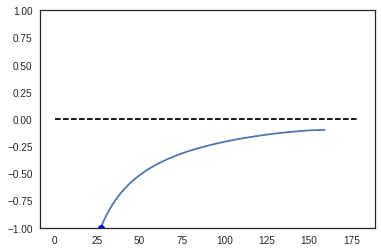

In [17]:
plt.plot(np.degrees(theta[1:]), sin_phi_t(Rl[1:], theta[1:], np.radians(15)))
plt.plot(np.degrees(t0), -1.0, "bo")
plt.plot(np.degrees(theta), np.zeros_like(theta), "k--")
plt.ylim(-1, 1)

## Plot $\theta_0$ vs i for cantoid and wilkinoid shells

Try to plot $R'_0/R_0$ vs $i$ as well. Where $R'_0 = R(\theta_0)\cos(\theta_0 - i)$

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


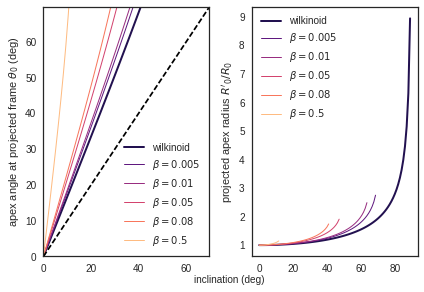

In [65]:
beta = ["wilkinoid", 5e-3, 1e-2, 0.05, 0.08, 0.5]
color = sns.color_palette("magma", n_colors=len(beta))
f= plt.figure()
ax1 = f.add_subplot(1, 2, 1, adjustable="box")
ax2 = f.add_subplot(1, 2, 2, adjustable="box")
for b, c in zip(beta, color):
    if b == "wilkinoid":
        R = wilkinoid(theta)
        thinf = np.pi
        lw = 2
        label = "wilkinoid"
    else:
        cantoid = Shell(beta=b, innertype="isotropic")
        R = cantoid.radius(theta)
        R_int = interp1d(theta, R)
        R0 = R[0]
        thinf = fsolve(_finfCRW, np.radians(91.0), args=(b))
        lw = 1
        label = r"$\beta = {}$"
    # find maximum inclination where the tangent line exists
    imax = thinf - 0.5*np.pi
    # set array size such that the step is the same in all cases
    step = np.radians(1.0) # 1 degree is good to make the brentq method work for all beta values
    narray = imax/step
    inc_arr = np.linspace(0.0, imax, narray, endpoint=False)
    t0_arr = []
    w = np.gradient(np.log(R))/np.gradient(theta)
    if b == 0.005:
        ilim = np.degrees(imax)
    for i in inc_arr:
        f_int_t0 = interp1d(theta, f_proj_t0(theta, w, np.degrees(i)))
        if i == 0.0:
            t0 = 0.0
        else:
            t0 = brentq(f_int_t0, step, thinf-step)
        t0_arr.append(t0)
    ax1.plot(np.degrees(inc_arr), np.degrees(t0_arr), label=label.format(b), c=c, lw=lw)
    if b == "wilkinoid":
        R0p = wilkinoid(np.array(t0_arr))*np.cos(np.array(t0_arr) - inc_arr)
    else:
        R0p = R_int(np.array(t0_arr))*np.cos(np.array(t0_arr)-inc_arr)/R0
    ax2.plot(np.degrees(inc_arr), R0p, label=label.format(b), c=c, lw=lw)
ax1.plot(np.linspace(0, 90), np.linspace(0, 90), "k--")
ax1.legend()
ax2.legend()
f.text(0.54, 0.005, "inclination (deg)", ha='center')
ax1.set_ylabel(r"apex angle at projected frame $\theta_0$ (deg)")
ax2.set_ylabel(r"projected apex radius $R'_0/R_0$")
ax1.set_xlim(0, ilim)
ax1.set_ylim(0, ilim)
f.tight_layout()
f.savefig("./Figures/cantoid-th0-vs-i.pdf")

## Now for ancantoid shells. Use two examples: $\xi = [0.8, 0.4]$

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


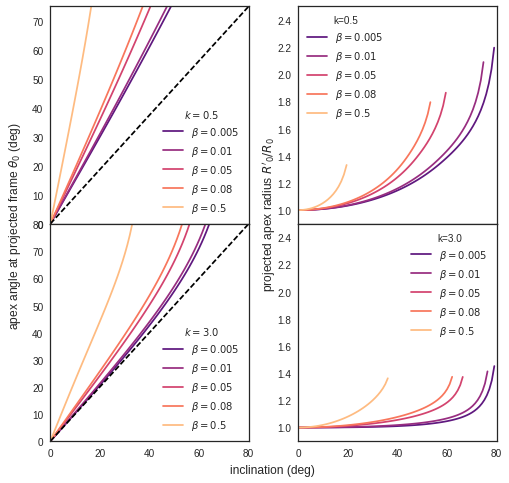

In [66]:
xi = [0.8, 0.4]
f= plt.figure()
for n, X in enumerate(xi):
    k = 2./X - 2
    ax1 = f.add_subplot(2, 2, 2*n+1, adjustable="box")
    ax2 = f.add_subplot(2, 2, 2*n+2)
    if n==0:
        ax1.set_xticks([])
        ax2.set_xticks([])
    for b, c in zip(beta[1:], color[1:]):
        ancantoid = Shell(beta=b, innertype="anisotropic", xi=X)
        R = ancantoid.radius(theta)
        R0 = R[0]
        R_int = interp1d(theta, R)
        thinf = fsolve(_finf, np.radians(91.0), args=(b, X))
        label = r"$\beta = {}$"
        # find maximum inclination where the tangent line exists
        imax = thinf - 0.5*np.pi
        # set array size such that the step is the same in all cases
        step = np.radians(1.0) # 1 degree is good to make the brentq method work for all beta values
        narray = imax/step
        inc_arr = np.linspace(0.0, imax, narray, endpoint=False)
        t0_arr = []
        w = np.gradient(np.log(R))/np.gradient(theta)
        if b == 0.005:
            ilim = np.degrees(imax)
        for i in inc_arr:
            f_int_t0 = interp1d(theta, f_proj_t0(theta, w, np.degrees(i)))
            if i == 0.0:
                t0 = 0.0
            else:
                t0 = brentq(f_int_t0, step, thinf-step)
            t0_arr.append(t0)
        R0p = R_int(np.array(t0_arr))*np.cos(np.array(t0_arr)-inc_arr)/R0
        ax1.plot(np.degrees(inc_arr), np.degrees(t0_arr), label=label.format(b), c=c)
        ax2.plot(np.degrees(inc_arr), R0p, label=label.format(b), c=c)
    ax1.legend(title=r"$k={}$".format(k))
    ax2.legend(title=r"k={}".format(k))
    ax1.plot(np.linspace(0, 90), np.linspace(0, 90), "k--")
    ax1.set_ylim(0, ilim)
    ax1.set_xlim(0, ilim)
    ax2.set_xlim(0, ilim)
    ax2.set_ylim(0.9, 2.5)
fontsize = 12
f.text(0.49, 0.52, r"projected apex radius $R'_0/R_0$", va="center", rotation="vertical", fontsize=fontsize)
f.text(0.51, 0.07, "inclination (deg)", ha='center', fontsize=fontsize)
f.text(0.05, 0.5, r"apex angle at projected frame $\theta_0$ (deg)", va='center', rotation="vertical", fontsize=fontsize)
f.subplots_adjust(wspace=0.25, hspace=0)
f.set_size_inches(8, 8)
f.savefig("./Figures/ancantoid-th0-vs-i.pdf")

## Plot $\theta_{90}$ vs $i$

Function to be zeroed:

In [67]:
def f_proj_t90(t, w, i):
    """
    Funtion to be zeroed in order to find \theta_90. Where \theta'(\theta_90) = np.pi/2
    Arguments:
    t: polar angle theta
    w: derivative of the natural logarithm of radius
    i: inclination respect the plane of sky (must be entered in degrees)
    """
    f1 = 1 + (w*np.sin(2*np.radians(i)))**2
    f2 = 2*w*np.cos(np.radians(i))**2
    return np.tan(t)*(1-np.sqrt(f1)) - f2